# Лабораторная работа 3.3
Трунов Антон М8О-304Б Вариант 16

Для таблично заданной функции путем решения нормальной системы МНК найти приближающие многочлены a) 1-ой  и б) 2-ой степени. Для каждого из приближающих многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой функции и приближающих многочленов.
$
x_i = \{0.1, 0.5, 0.9, 1.3, 1.7, 2.1\} \\ 
f_i = \{-2.2026, -0.19315, 0.79464, 1.5624, 2.2306, 2.8419\}\\
i = 0,...,5
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
x = np.array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1])
y = np.array([-2.2026, -0.19315, 0.79464, 1.5624, 2.2306, 2.8419])

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.


In [10]:
def design_matrix(X,m):
    A = np.zeros((len(X),m+1))
    for i in range(m+1):
        A[:,i] = [x**i for x in X]
    return A

In [11]:
"""F(b) = sum[y - f(x,b)] -> min, f(x,b)= sum[b*fi(x)] equivalent F(b) = ||y - Ab||^2 => F'(b) = 0, A.T*A*b = A.T*y"""
def solve_system(A, y):
    B = np.transpose(np.copy(A))
    Y = np.copy(y)
    Y = B @ y  # A_T * y
    B = B @ A  # A_T * A
    return np.linalg.solve(B, Y)

In [12]:
def P_m(x,m,b):
    Px = 0
    for j in range(m+1):
        Px += b[j] * x**j  
    return Px

In [13]:
A = design_matrix(x.copy(),3)
b = solve_system(A,y)
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
print("Design matrix:\n",A,"\nCoefficients:\n",b)

Design matrix:
 [[1.    0.1   0.01  0.001]
 [1.    0.5   0.25  0.125]
 [1.    0.9   0.81  0.729]
 [1.    1.3   1.69  2.197]
 [1.    1.7   2.89  4.913]
 [1.    2.1   4.41  9.261]] 
Coefficients:
 [-2.792  6.523 -3.398  0.75 ]


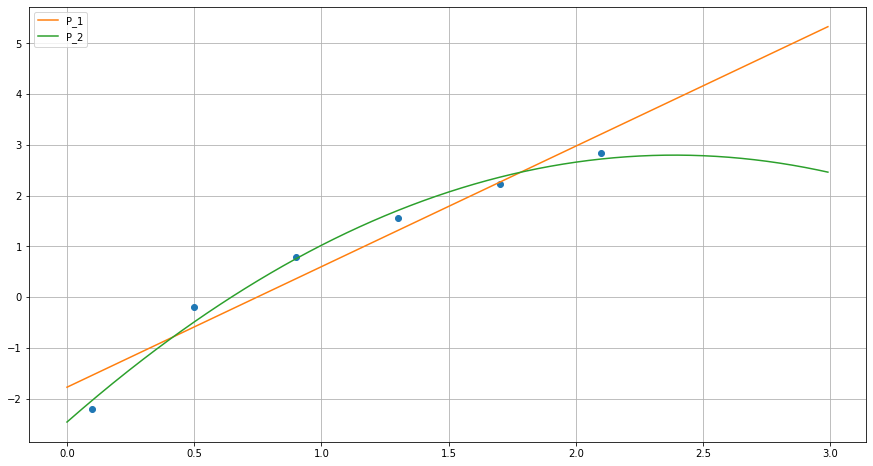

In [15]:
plt.plot(x, y, 'o')
plt.grid()
X = np.arange(0, 3, 0.01)
for m in range(1, 3):
    A = design_matrix(x.copy(),m)
    b = solve_system(A,y)
    P = [P_m(x,m,b) for x in X]
    plt.plot(X,P,label='P_%s' % m)
    plt.legend()
plt.show()

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

In [27]:
def square_sigma(b,X,y,m):
    sum_sigma = 0
    P = [P_m(x,m,b) for x in X]
    return sum(np.sqrt((P[k]-y[k])**2 / (len(x)-m)) for k in range(len(X)))

for m in range(6): 
    A = design_matrix(x.copy(),m)
    b = solve_system(A,y)
    sg = square_sigma(b,x,y,m)
    print("sigma_",m,"=",sg)

sigma_ 0 = 3.3623370027432804
sigma_ 1 = 0.9592626847717435
sigma_ 2 = 0.4513305714285707
sigma_ 3 = 0.1877963716314988
sigma_ 4 = 0.05417560335603077
sigma_ 5 = 8.674963525301393e-11


# Лабораторная работа 3.4
Трунов Антон М8О-304Б Вариант 16
# Задание
Вычислить первую и вторую производную от таблично заданной функции $y_i = f(x_i), i = 0,...,4$ в точке $x = X^*=2.0$.
$
x_i = \{0.0, 1.0, 2.0, 3.0, 4.0\} \\ 
f_i = \{0.0, 2.0, 3.4142, 4.7321, 6.0\}\\
i = 0,...,4
$

In [28]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([0.0, 2.0, 3.4142, 4.7321, 6.0])
xx = 2.0

In [29]:
def deriv(f, x, h):
    x1 = x + h
    df = f(x1,m,b) - f(x,m,b)    #two point
    dx = x1 - x
    return df/dx

In [30]:
def deriv2(f, x, h):
    x1 = x + h
    x2 = x + 2*h
    df = f(x2,m,b) - 2*f(x1,m,b) + f(x,m,b)
    dx = x1 - x
    return df/(dx*dx)

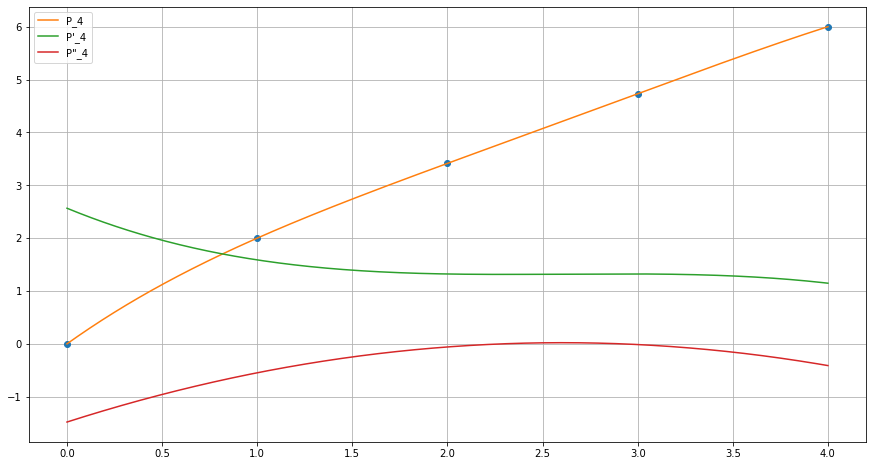

F'(2.0) = 1.3213408117859549. 
F"(2.0) = -0.058831901017532745


In [31]:
plt.plot(x, y, 'o')
plt.grid()

N = 500
X = np.linspace(0, 4, N)
m = 4
A = design_matrix(x.copy(),m)
b = solve_system(A,y)

P = [P_m(x,m,b) for x in X]
dP = [deriv(P_m,x,1./N) for x in X]
ddP = [deriv2(P_m,x,1./N) for x in X]

plt.plot(X,P,label='P_%s' % m)
plt.plot(X,dP,label='P\'_%s' % m)
plt.plot(X,ddP,label='P"_%s' % m)
plt.legend()
plt.show()

print("F\'(%s) = %s. \nF\"(%s) = %s" % (xx, deriv(P_m,xx,1./N),xx, deriv2(P_m,xx,1./N)))

# Лабораторная работа 3.5
Трунов Антон М8О-304Б Вариант 16
# Задание
Вычислить определенный интеграл $\int_{0}^{2} \frac{x^2}{x^4+256}\,dx$ методами прямоугольников, трапеций, Симпсона с шагами $h_1 = 0.5,h_2 = 0.25$. Оценить погрешность вычислений, используя  Метод Рунге-Ромберга.

In [12]:
f = lambda x: x**2 / (x**4 + 256)
a = 0
b = 2
h = 0.25
N = int((b - a)/h)
print(N)

8


In [44]:
def midpoint_rule(func, a, b, h):
    N = int((b - a)/h)
    X = np.linspace(a,b,N+1)    
    return h * sum(func((X[j] + X[j+1]) / 2) for j in range(N) )

In [45]:
print(midpoint_rule(f, a, b, h))

0.01011442236874015


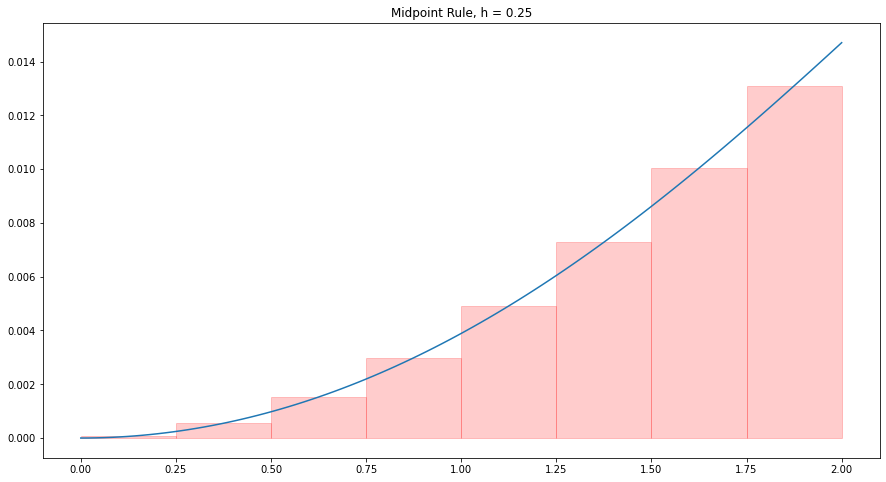

In [46]:
x = np.linspace(a,b,100)
plt.plot(x,f(x))
X = np.linspace(a,b,N+1)
for i in range(N):
    xs = [X[i],X[i],X[i+1],X[i+1]]
    ys = [0,f((X[i] + X[i+1]) / 2),f((X[i] + X[i+1]) / 2),0]
    plt.fill(xs,ys,'r',edgecolor='r',alpha=0.2)
plt.title('Midpoint Rule, h = {}'.format(h))
plt.show()

In [47]:
def trapezium(func, a, b, h):
    N = int((b - a)/h)
    x = np.linspace(a,b,N+1)    
    return h * sum(func(x[j]) + func(x[j+1])  for j in range(N) ) / 2

In [48]:
print(trapezium(f, a, b, h))

0.010215898252740406


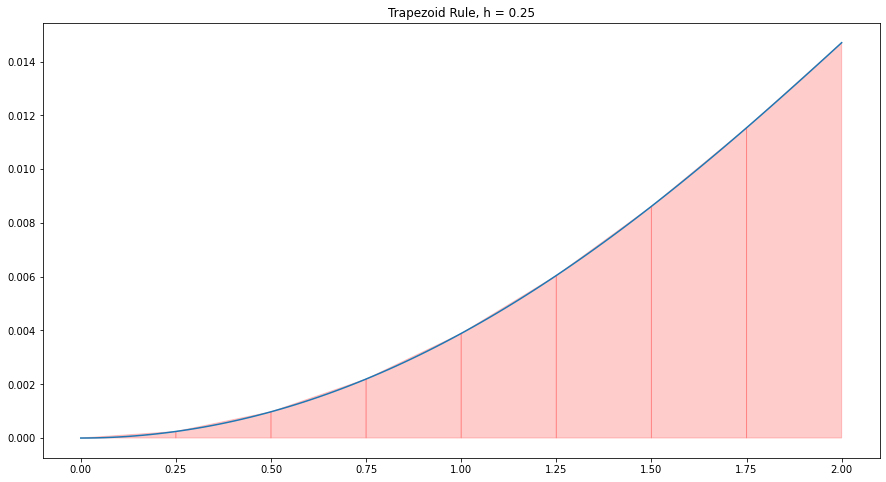

In [49]:
X = np.linspace(a,b,100)
plt.plot(X,f(X))
x = np.linspace(a,b,N+1)
for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'r',edgecolor='r',alpha=0.2)
plt.title('Trapezoid Rule, h = {}'.format(h))
plt.show()

In [50]:
def simpson(func, a, b, h):
    N = int((b - a)/h)
    x = np.linspace(a,b,N+1)    
    return h * sum(func(x[j]) + 4*func((x[j] + x[j+1]) / 2) + func(x[j + 1])  for j in range(N)) / 6 

In [51]:
print(simpson(f, a, b, h))

0.010148247663406901


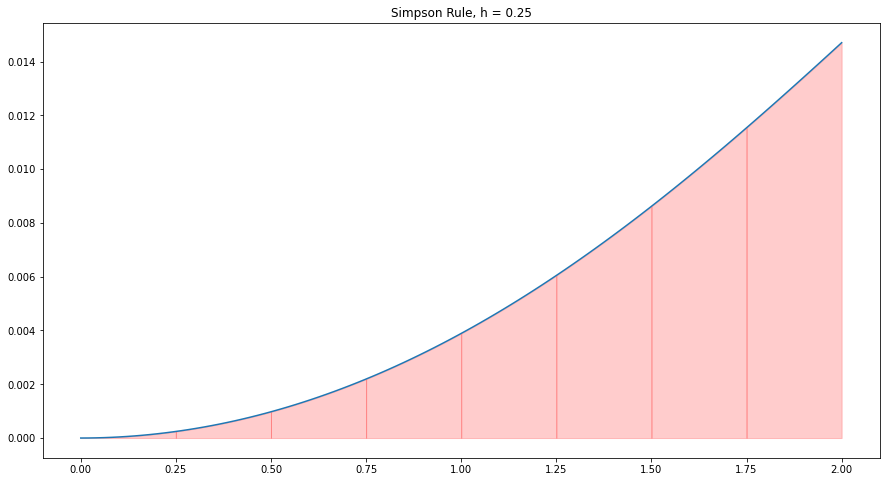

In [52]:
X = np.linspace(a,b,100)
plt.plot(X,f(X))

m = 2
x = np.linspace(a,b,N+1)
for j in range(N):
    xn = np.array([x[j], (x[j] + x[j+1]) / 2, x[j + 1]])
    yn = f(xn)
    A = design_matrix(xn.copy(),m)
    B = solve_system(A,yn)
    xx = np.linspace(x[j],x[j+1],20)
    P = [P_m(xi,m,B) for xi in xx]
    plt.fill_between(xx,P,color='r',edgecolor='r',alpha=0.2)
plt.title('Simpson Rule, h = {}'.format(h))
plt.show()

In [53]:
import  scipy.integrate as integrate

I = integrate.romberg(f,a,b)
M = midpoint_rule(f,a,b,h)
T = trapezium(f,a,b,h)
S = simpson(f,a,b,h)
print("Integration error at h = %s using scipy:\nMidpoint rule = %s\nTrapezoid rule = %s\nSimpson rule = %s" % (h,abs(I-M),abs(I-T),abs(I-S)))

Integration error at h = 0.25 using scipy:
Midpoint rule = 3.3845652819681354e-05
Trapezoid rule = 6.76302311805755e-05
Simpson rule = 2.0358152929070283e-08


In [71]:
def runge_romberg(method,p,k):
    F_h = method(f,a,b,h)
    F_kh = method(f,a,b,k*h)
    return F_h + (F_h - F_kh)/(2**p - 1)

k = 2

print("Integration error at h =",h)
M = midpoint_rule(f,a,b,h)
I = runge_romberg(midpoint_rule,2,k)
print("Midpoint rule =",abs(M-I))

T = trapezium(f,a,b,h)
I = runge_romberg(trapezium,2,k)
print("Trapezoid rule=",abs(T-I))

S = simpson(f,a,b,h)
I = runge_romberg(simpson,4,k)
print("Simpson rule=",abs(S-I))

Integration error at h = 0.25
Midpoint rule = 3.40322390428964e-05
Trapezoid rule= 6.785753370964695e-05
Simpson rule= 1.3796291742709799e-08
